# Sistemas de Control
Este cuaderno de Jupyter utiliza el paquete de Julia `ControlSystems.jl` el cual contiene muchas de las herramientas necesarias para el diseño de sistemas de control. Por el momento, es uno de los paquetes más robustos en esta parte y es el recomendado actualmente. Acá se trata de explorar las capacidades importantes de este paquete pero se invita al lector a leer más sobre las capacidades de este en la [documentación oficial](https://juliacontrol.github.io/ControlSystems.jl/latest/).

En este cuaderno se cubren las siguientes funcionalidades: 

1. Creación de Funciones de Transferencia
2. Ingreso de Modelos en Variable de Estado
3. Funcionalidades para graficar
    - Diagramas de Nyquist
    - Diagramas de Bode
    - Diagrama LGR o _root locus_
    - Entre otros
4. Respuestas en frecuencia y en el tiempo
5. Ejemplos de Análisis

Lo primero antes de poder utilizar este paquete es instalarlo por medio de la terminar de Julia, con los siguientes comandos:
```julia
    using Pkg
    Pkg.add("ControlSystems")
```
Luego se debe incluir en nuestro programa, es generalmente mejor utilizar el keyword `using` al llamar un paquete para no tener que llamar su `namespace` cada vez que se quiera utilizar.  


In [1]:
using ControlSystems
using Plots
pyplot()

Plots.PyPlotBackend()

## Creación de Funciones de Transferencia 
La base más importante para sistemas de control es la utilización de Funciones de Transferencia, una función de transferencia tiene la siguiente forma: 

<br/>

<br/>
   
<div>
    
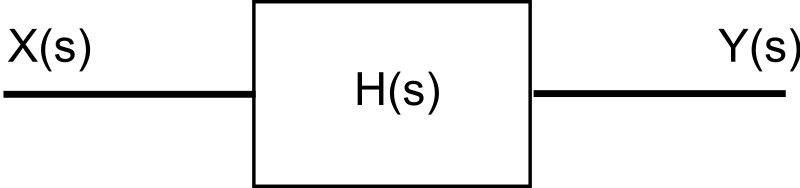

</div>


De donde sale la siguiente relación entrada salida que define $H(s)$ como la función de transferencia
$$
H(s) = \frac{Y(s)}{X(s)} 
$$
Por ejemplo, tenemos la siguiente función de transferencia: 
$$
F(s) = \frac{s+1}{(s+2)(s+3)} \\
F(s) = \frac{s+1}{s^2 + 5s + 6}
$$

Separando sus partes en denominador y numerador la función de transferencia se crea con la siguiente función: `tf(num, den)` 


In [2]:
fs = tf([1,1], [1, 5, 6])

TransferFunction{ControlSystems.SisoRational{Int64}}
    s + 1
-------------
s^2 + 5*s + 6

Continuous-time transfer function model

Otro ejemplo: 
$$
F(s) = \frac{s+2}{3 s^3 + 5s^2 + 6s}
$$

In [3]:
fs2 = tf([1,2], [3,5,6,0])

TransferFunction{ControlSystems.SisoRational{Int64}}
       s + 2
-------------------
3*s^3 + 5*s^2 + 6*s

Continuous-time transfer function model

Existe una segunda forma de ingresar una TF y es por medio de su representación `zpk` que significa la representación en ceros, polos y ganancia. Para construir una TF por medio de esta representación se utiliza la función `zpk()` de la forma `zpk(ceros, polos, ganancia)`. Construyendo el primer ejemplo:  

In [4]:
fs = zpk([-1],[-2,-3], 1)

TransferFunction{ControlSystems.SisoZpk{Int64,Int64}}
     s + 1
1--------------
 (s + 2)(s + 3)

Continuous-time transfer function model

Es importante mencionar que los dos métodos de creación permiten obtener una función de transferencia, sin embargo, dependiendo del método que se utiliza para crearla, el tipo resultante es diferente. Para convertir de un tipo al otro se puede hacer:

In [5]:
tf(fs)

TransferFunction{ControlSystems.SisoRational{Int64}}
    s + 1
-------------
s^2 + 5*s + 6

Continuous-time transfer function model

Este paquete tambien soporta la siguiente nomenclatura para crear funciones de transferencia, muy similar a Matlab:

In [6]:
s = tf("s")
P = (s+1.0)/((s+1)*(s+2)^2)

TransferFunction{ControlSystems.SisoRational{Float64}}
          1.0*s + 1.0
-------------------------------
1.0*s^3 + 5.0*s^2 + 8.0*s + 4.0

Continuous-time transfer function model

Como ultimo comentario, puede ser útil algunas veces utilizar números flotantes en vez de enteros a la hora de declarar una función de transferencia. Existe otra función constructora llamada `feedback()` dicha función permite construir las siguientes formulas: 
$$
\frac{L}{1+L} \text{       }\text{ }
\frac{P1}{1+P1\cdot P2}
$$
Dependiendo de cómo se utiliza, por ejemplo `feedback(sys)` retorna la primera y `feedback(P1,P2)` construye la segunda.


## Creación de Modelos en Variables de Estado

Un modelo en variables de estado se representa por un sistema de ecuaciones con la siguiente forma:
<br/>
<br/>
$$
\dot{x}(t) = \textbf{A}(t)x(t) + \textbf{B}(t)u(t) \\
y(t) = \textbf{C}(t)x(t) + \textbf{D}(t)u(t)
$$

Donde las variables A, B, C y D son matrices las cuales representan diferentes partes del sistema. Para poder ingresar un sistema en variables de estado se puede hacer de la siguiente forma: `ss(A,B,C,D)`.

Por ejemplo, entonces:


In [7]:
state_model = ss([5 0; 0 5], [2 ; 2], [3 3], [0])

StateSpace{Int64,Array{Int64,2}}
A = 
 5  0
 0  5
B = 
 2
 2
C = 
 3  3
D = 
 0

Continuous-time state-space model

## Funcionalidades para Graficar
El paquete `ControlSystems.jl` posee variadas opciones relevantes en el diseño de sistemas de control. Entre ellas se pueden encontrar los siguientes tipos de gráficos:

- `bodeplot()`
- `gangoffourplot()` 
- `impulseplot()`
- `marginplot()`
- `nyquistplot()`
- `pzmap()`
- `stepplot()`
- `rlocusplot()`
- `pidplots()`

### Diagrama de Bode

Siguiendo el orden anterior entonces primeros tenemos el diagrama de bode a una función de transferencia o modelo en variables de estado. Por ejemplo, tengamos la siguiente función de transferencia de lazo cerrado: 
$$
1 + L(s) = 5\frac{s+1}{(s+1)(s+2)}
$$

La funcion `setPlotScale()` permite escoger la escala de magnitud para el diagrama de bode, permite `dB` o `log10`.

In [8]:
sys = zpk([-1],[-1,-1],5)

TransferFunction{ControlSystems.SisoZpk{Int64,Int64}}
     s + 1
5--------------
 (s + 1)(s + 1)

Continuous-time transfer function model

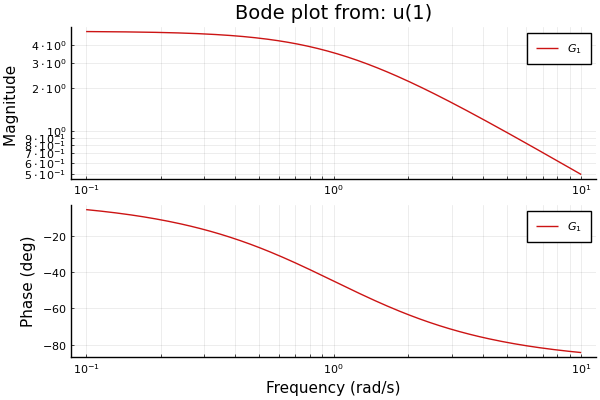

In [9]:
bodeplot(sys)

Es importante mencionar que se le pueden agregar detalles a las gráficas por medio de los mismos comandos vistos en el cuaderno de `Plots.jl`, dado que este paquete es que se utiliza para realizar las gráficas.

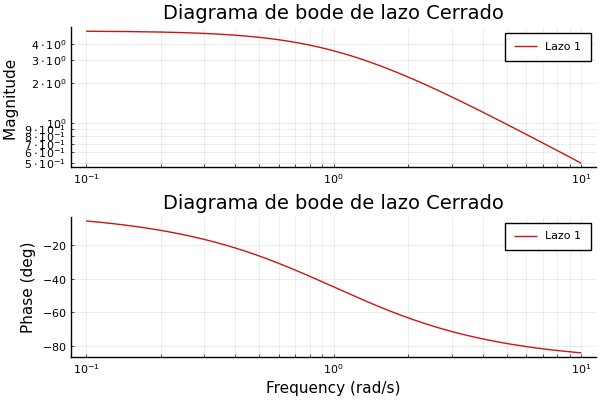

In [10]:
bodeplot(sys, title= "Diagrama de bode de lazo Cerrado", label = "Lazo 1")

Otra funcionalidad es poder deshabilitar el diagrama de fase y graficar más de un sistema al mismo tiempo.

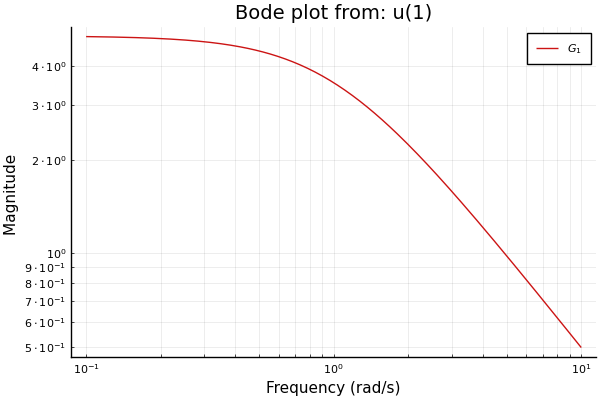

In [11]:
bodeplot(sys; plotphase=false)

In [12]:
sys2 = tf(1.0, [1,2,3])

TransferFunction{ControlSystems.SisoRational{Float64}}
         1.0
---------------------
1.0*s^2 + 2.0*s + 3.0

Continuous-time transfer function model

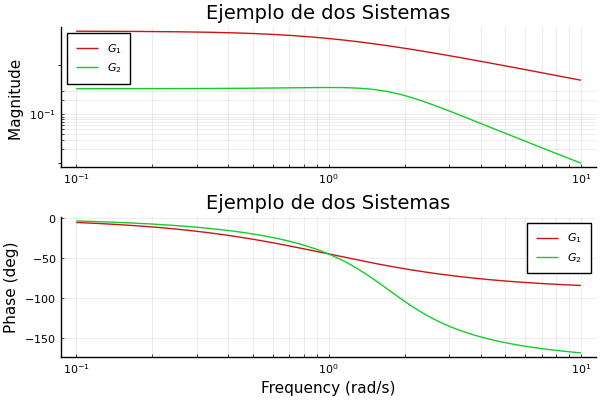

In [13]:
bodeplot([sys,sys2], title= "Ejemplo de dos Sistemas")

### Gang of Four
Este nombre se le da a un conjunto de 4 ecuaciones importantes en el diseño de sistemas de control. Las 4 ecuaciones son las siguientes:

- $\frac{PC}{1+PC}$ Función de sensibilidad complementaria
- $\frac{P}{1+PC}$ _Load Disturbance sensitivity function_
- $\frac{C}{1+PC}$ _Noise sensitivty function_
- $\frac{1}{1+PC}$ Función de sensibilidad

El grupo de funciones anterior describen diferentes respuestas del sistema de control y todas se pueden graficar rápidamente por medio de la función `gangoffourplot()` con la siguiente forma:
```julia
gangoffour(Plant, Controller)
```
Si lo que se desea más bien es obtener todas las funciones anteriores de forma individual se puede llamar la función `gangoffour(Plant, Controller)` y lo que retornará será algo similar a un __tuple__ con las cuatro funciones de transferencia.


In [14]:
gangoffour(sys,sys2)

(TransferFunction{ControlSystems.SisoZpk{Float64,Complex{Float64}}}
                (1.0*s + 1.0)(1.0*s^2 + 2.0*s + 2.9999999999999996)
1.0------------------------------------------------------------------------------
   (1.0*s + 2.328268855668609)(1.0*s^2 + 0.67173114433139*s + 3.4360292972705824)

Continuous-time transfer function model, TransferFunction{ControlSystems.SisoZpk{Float64,Complex{Float64}}}
         (1.0*s^2 + 2.0*s + 2.9999999999999996)(1.0*s^2 + 1.9999999999999998*s + 1.0000000000000002)
5.0--------------------------------------------------------------------------------------------------------
   (1.0*s + 1.0)(1.0*s + 1.0)(1.0*s + 2.328268855668609)(1.0*s^2 + 0.67173114433139*s + 3.4360292972705824)

Continuous-time transfer function model, TransferFunction{ControlSystems.SisoZpk{Float64,Complex{Float64}}}
                             1.0*s + 0.9999999999999993
1.0------------------------------------------------------------------------------
   (1.0*s + 2.3282688556686

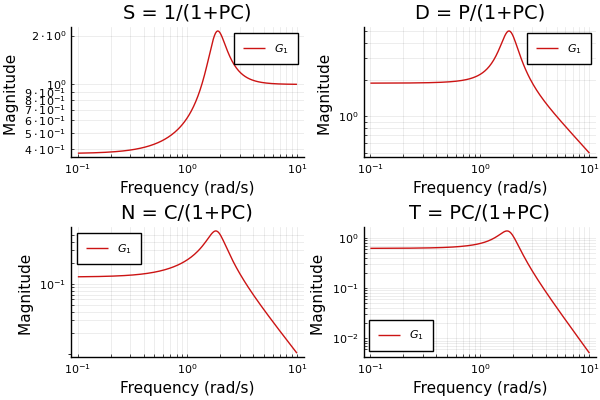

In [15]:
gangoffourplot(sys,sys2)

### Impulse Plot
Esta función como dice su nombre dará como resultado la gráfica de respuesta el impulso del sistema. Por ejemplo:

┌ Warning: Attribute alias `color` detected in the user recipe defined for the signature (::ControlSystems.Impulseplot). To ensure expected behavior it is recommended to use the default attribute `seriescolor`.
└ @ Plots C:\Users\josea\.julia\packages\Plots\shY1Z\src\pipeline.jl:15
┌ Warning: Attribute alias `ylabel` detected in the user recipe defined for the signature (::ControlSystems.Impulseplot). To ensure expected behavior it is recommended to use the default attribute `yguide`.
└ @ Plots C:\Users\josea\.julia\packages\Plots\shY1Z\src\pipeline.jl:15
┌ Warning: Attribute alias `xlabel` detected in the user recipe defined for the signature (::ControlSystems.Impulseplot). To ensure expected behavior it is recommended to use the default attribute `xguide`.
└ @ Plots C:\Users\josea\.julia\packages\Plots\shY1Z\src\pipeline.jl:15


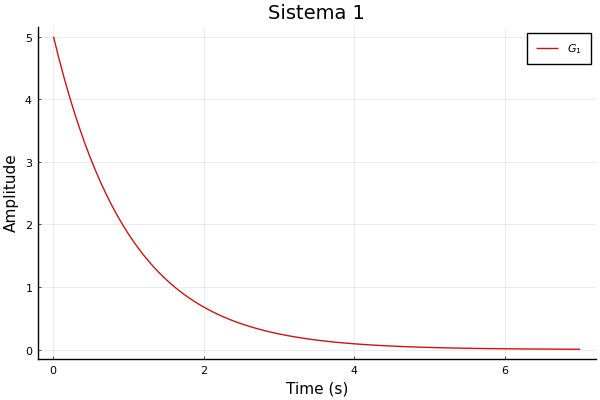

In [16]:
impulseplot(sys; title="Sistema 1")

┌ Warning: Attribute alias `color` detected in the user recipe defined for the signature (::ControlSystems.Impulseplot). To ensure expected behavior it is recommended to use the default attribute `seriescolor`.
└ @ Plots C:\Users\josea\.julia\packages\Plots\shY1Z\src\pipeline.jl:15
┌ Warning: Attribute alias `ylabel` detected in the user recipe defined for the signature (::ControlSystems.Impulseplot). To ensure expected behavior it is recommended to use the default attribute `yguide`.
└ @ Plots C:\Users\josea\.julia\packages\Plots\shY1Z\src\pipeline.jl:15
┌ Warning: Attribute alias `xlabel` detected in the user recipe defined for the signature (::ControlSystems.Impulseplot). To ensure expected behavior it is recommended to use the default attribute `xguide`.
└ @ Plots C:\Users\josea\.julia\packages\Plots\shY1Z\src\pipeline.jl:15


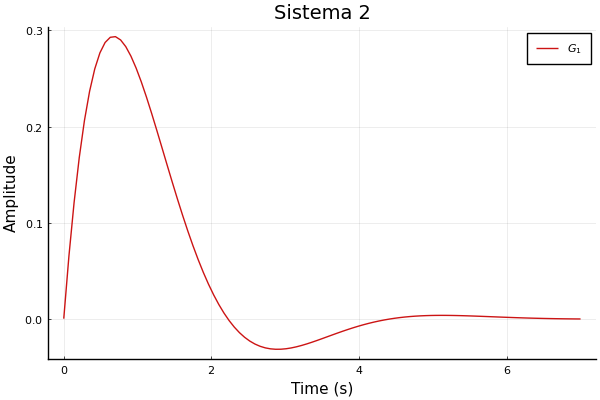

In [17]:
impulseplot(sys2; title= "Sistema 2")

### Margin Plot
Por medio de la función `marginplot()` se grafican todos los márgenes de fase del sistema y se despliegan los valores resultantes para estos. Por ejemplo, para el primer sistema `sys` el margen de fase es de 101.54 grados y no hay un margen de ganancia dado que nunca se llena a los -180 grados en fase.  

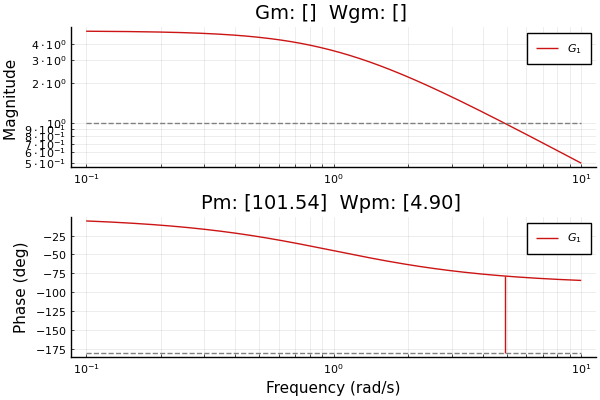

In [18]:
marginplot(sys)

Ahora vemos un ejemplo donde si hay un margen de ganancia:

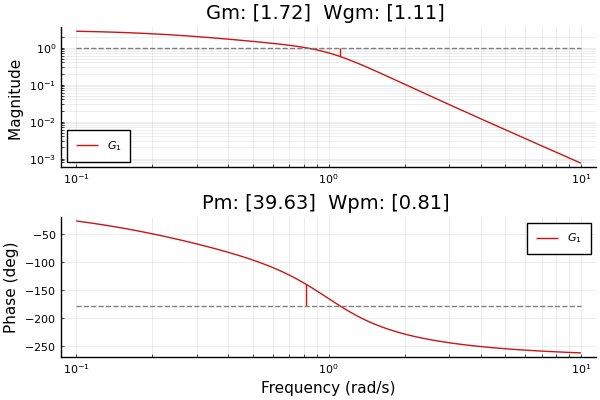

In [19]:
sys3 = 3*tf([1.0],[4,5,5,1])
marginplot(sys3)

### Diagrama de Nyquist
El diagramade Nyquist permite conocer la estabilidad de un sistema a lazo cerrado a partir de su cantidad de encierros en el punto `-1`. 

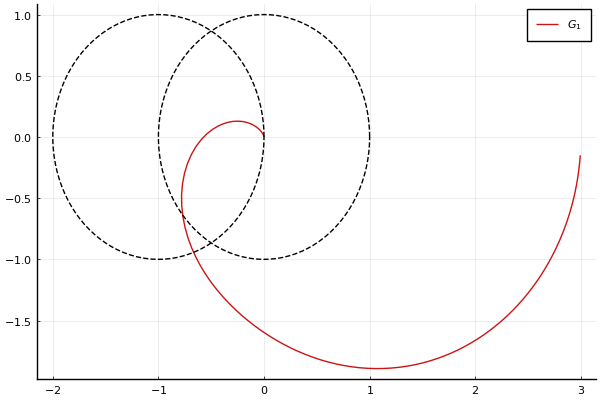

In [20]:
nyquistplot(sys3)

Los circulos que se observan en la grafica, se llaman circulos de ganancia. Estos pueden ser deshabilitados por medio del argumento `gaincircles=false`

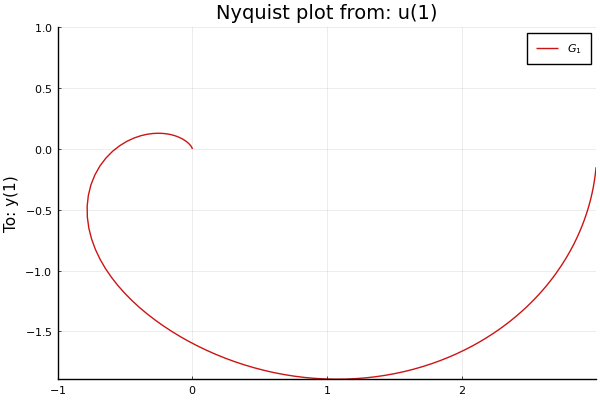

In [21]:
nyquistplot(sys3; gaincircles=false)

### Mapa de Polos y Ceros
La función `pzmap()` grafica el mapa de ceros y polos de la función de transferencia o modelo en variables de estado.

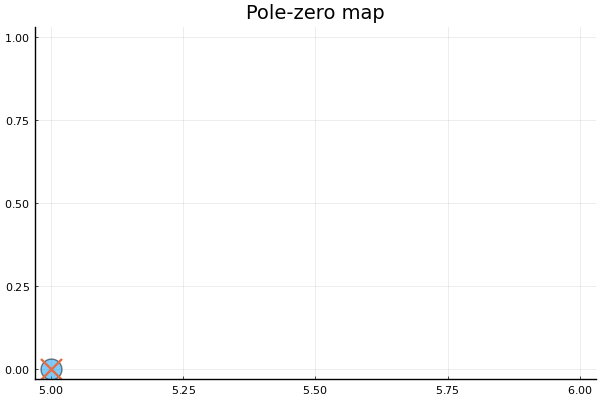

In [22]:
pzmap(state_model)

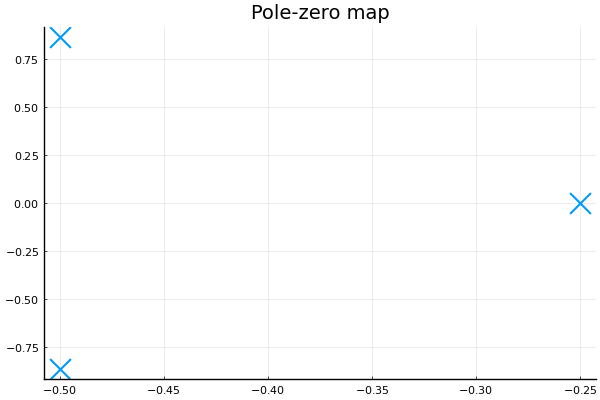

In [23]:
pzmap(sys3)

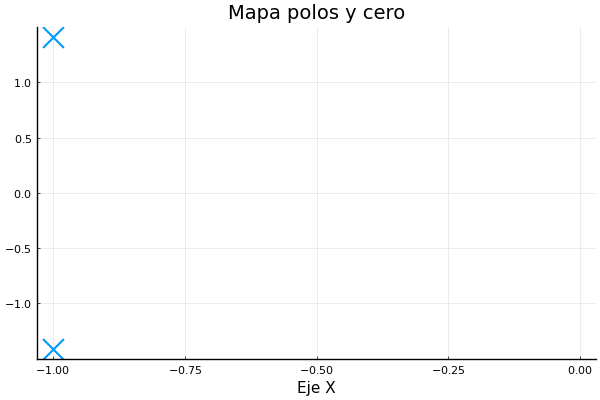

In [24]:
pzmap(sys2; title = "Mapa polos y cero", xlabel = "Eje X")

### Step plot
Para realizar un diagrama de la respuesta el escalon de un sistema se puede utilizar la funcion `stepplot()`.

┌ Warning: Attribute alias `color` detected in the user recipe defined for the signature (::ControlSystems.Stepplot). To ensure expected behavior it is recommended to use the default attribute `seriescolor`.
└ @ Plots C:\Users\josea\.julia\packages\Plots\shY1Z\src\pipeline.jl:15
┌ Warning: Attribute alias `ylabel` detected in the user recipe defined for the signature (::ControlSystems.Stepplot). To ensure expected behavior it is recommended to use the default attribute `yguide`.
└ @ Plots C:\Users\josea\.julia\packages\Plots\shY1Z\src\pipeline.jl:15
┌ Warning: Attribute alias `xlabel` detected in the user recipe defined for the signature (::ControlSystems.Stepplot). To ensure expected behavior it is recommended to use the default attribute `xguide`.
└ @ Plots C:\Users\josea\.julia\packages\Plots\shY1Z\src\pipeline.jl:15


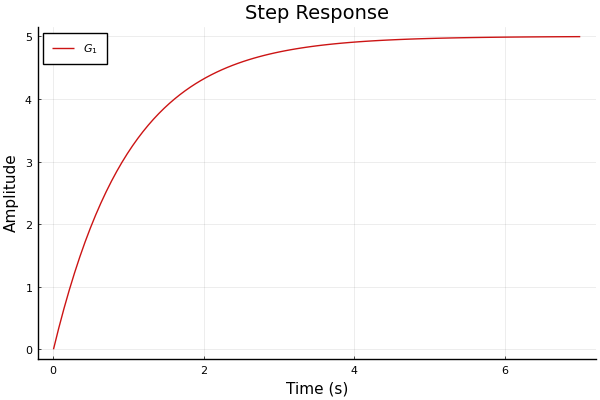

In [25]:
stepplot(sys)

┌ Warning: Attribute alias `color` detected in the user recipe defined for the signature (::ControlSystems.Stepplot). To ensure expected behavior it is recommended to use the default attribute `seriescolor`.
└ @ Plots C:\Users\josea\.julia\packages\Plots\shY1Z\src\pipeline.jl:15
┌ Warning: Attribute alias `ylabel` detected in the user recipe defined for the signature (::ControlSystems.Stepplot). To ensure expected behavior it is recommended to use the default attribute `yguide`.
└ @ Plots C:\Users\josea\.julia\packages\Plots\shY1Z\src\pipeline.jl:15
┌ Warning: Attribute alias `xlabel` detected in the user recipe defined for the signature (::ControlSystems.Stepplot). To ensure expected behavior it is recommended to use the default attribute `xguide`.
└ @ Plots C:\Users\josea\.julia\packages\Plots\shY1Z\src\pipeline.jl:15


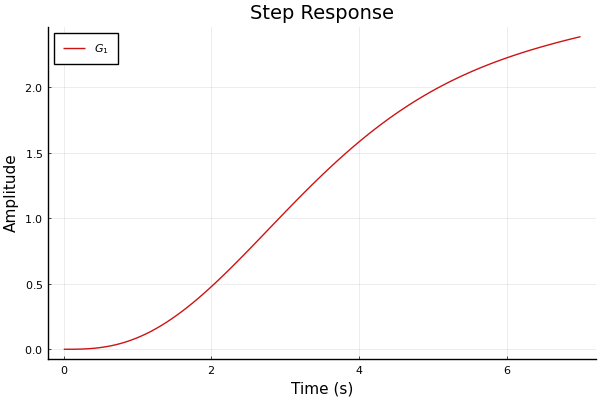

In [26]:
stepplot(sys3)

### Diagrama LGR 
El diagrama LGR de un sistema de puede graficar por medio de la función `rlocusplot()` esta función tiene dos parámetros, el sistema como tal y un rango de ganancias a utilizar para el LGR. Si no, se indica ningún rango de ganancias la función utiliza un valor por defecto. Además, si se desea un algoritmo más complejo para el rango por defecto de ganancias se puede llamar el paquete `OrdinaryDiffEq.jl` y al llamar la función este utilizara este paquete para un nuevo algoritmo. También, se le puede pasar un valor de ganancia máxima al utilizar el paquete anterior. Para utilizar la función entonces: 
```julia
rlocusplot(sys, rango de ganancias k)
```

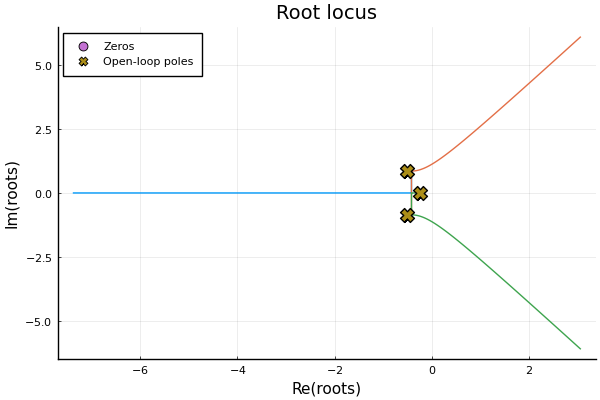

In [27]:
rlocusplot(sys3)

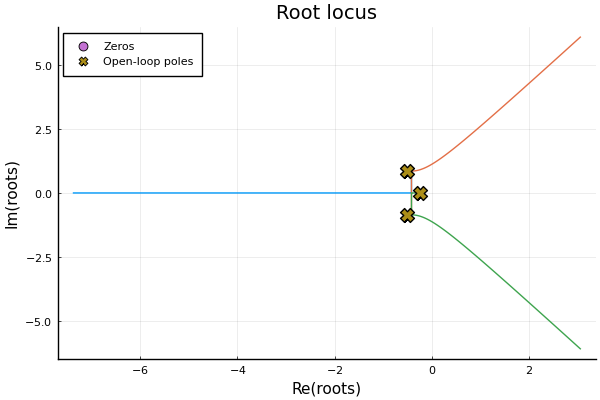

In [28]:
using OrdinaryDiffEq
rlocusplot(sys3)

### PID plot
Existe una herramienta la cual permite obtener las gráficas de un sistema de control el cual incluye la planta `P` y el controlador `C` de tipo PID. Primero, sin embargo, existe la función `pid()` la cual retorna un controlador PID de tipo paralelo por defecto con los parámetros que uno le ingrese: 
```julia
C = pid(; kp = 0, ki =0, kd = 0, time = false, series = false) 
```
Como se ve, a la función se le pasan los valores en forma de ganancia para los parámetros del controlador, el argumento `time` permite indicar si lo que se ingresan son ganancias o constantes de tiempo. Mientras que `series` permite crear un controlador pid serie en vez de paralelo.


In [29]:
C = pid(kp = 2, ki =4.0, kd = 2, time = true, series = false)

TransferFunction{ControlSystems.SisoRational{Float64}}
8.0*s^2 + 8.0*s + 1.0
---------------------
        4.0*s

Continuous-time transfer function model

In [30]:
C = pid(kp = 2, ki =4.0, kd = 2, time = false, series = true)

TransferFunction{ControlSystems.SisoRational{Float64}}
4.0*s^2 + 2.0*s + 8.0
---------------------
        1.0*s

Continuous-time transfer function model

Por otro lado, se tiene la función `pidplots()` la cual ahora si graficar el comportamiento del sistema de control como tal. Sus parámetros de entrada posibles tienen la siguiente forma: 
```julia
pidplots(P, args...; kps = 0, kis = 0, kds = 0, time = false, series = false)
```
Donde se recibe la planta a controlar, los parámetros de un controlador o __los parámetros de los controladores a probar que se pueden ingresar por medio de vectores que deben todos ser del mismo tamaño__. Los `args...` indican las gráficas a realizar y soportan:

- `:gof` - Gang of Four
- `:nyquist`
- `:controller`
- `:pz`

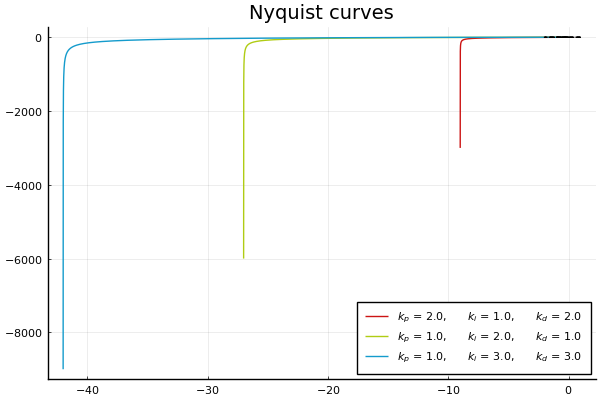

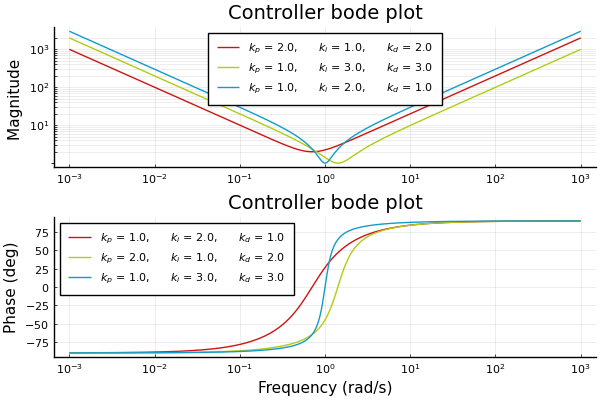

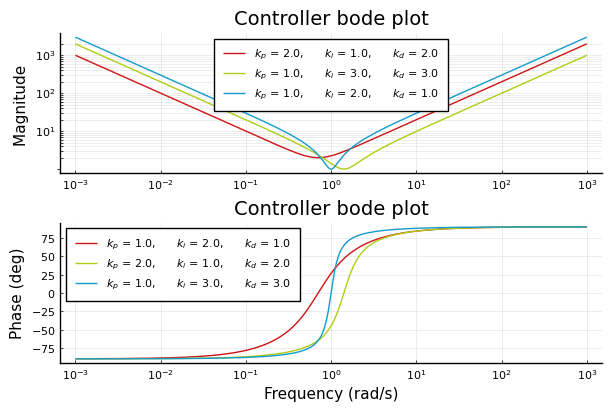

In [31]:
pidplots(sys3, :controller, :nyquist; kps =[2,1,1], kis =[1,2,3], kds =[2,1,3])

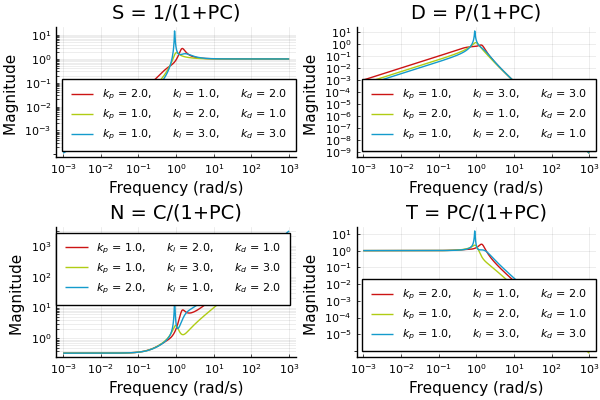

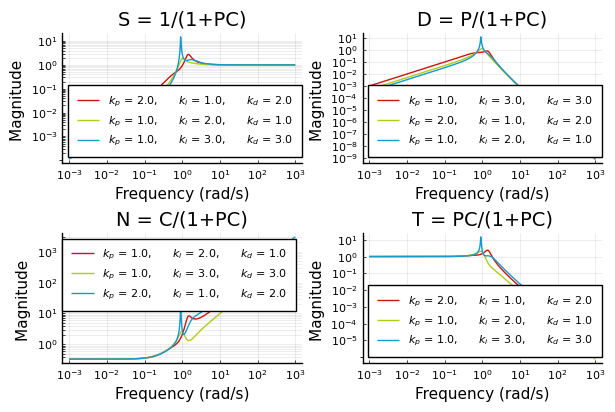

In [32]:
pidplots(sys3, :gof; kps =[2,1,1], kis =[1,2,3], kds =[2,1,3])

### Análisis
Este paquete incluye varias herramientas de análisis para los sistemas de control, si se desea explorar la lista entera de estas capacidades de pueden encontrar en la parte de análisis [de la documentación oficial](https://juliacontrol.github.io/ControlSystems.jl/latest/lib/analysis/). Se incluyen, por ejemplo:

- `damp()` y `dampreport()`
- `dcgain()`
- `margin()`
- `pole()`
- `zpkdata()`

Siguiendo el orden anterior, la función `damp()` y `dampreport()` sirven para calcular los valores de frecuencia natural, factor de amortiguamiento de los polos, además retorna los polos. `damp()` retorna los valores de la siguiente forma:
```julia
wn, fa, ps = damp(sys)
```
Mientras que `dampreport()` calcula las mismas cosas, pero solo las despliega.

In [33]:
wn, fa, ps = damp(sys3)

([0.25000000000000006, 1.0000000000000004, 1.0000000000000004], [1.0, 0.4999999999999998, 0.4999999999999998], Complex{Float64}[-0.25000000000000006 + 0.0im, -0.5 + 0.8660254037844392im, -0.5 - 0.8660254037844392im])

In [34]:
dampreport(sys3)

|     Pole      |   Damping     |   Frequency   | Time Constant |
|               |    Ratio      |   (rad/sec)   |     (sec)     |
+---------------+---------------+---------------+---------------+
|  -2.500e-01   |  1.000e+00    |  2.500e-01    |  4.000e+00    |
|  +0.000e+00 im|               |               |               |
|  -5.000e-01   |  5.000e-01    |  1.000e+00    |  2.000e+00    |
|  +8.660e-01 im|               |               |               |
|  -5.000e-01   |  5.000e-01    |  1.000e+00    |  2.000e+00    |
|  -8.660e-01 im|               |               |               |


Continuando `dcgain()` retorna la ganancia dc del sistema. Por ejemplo:

In [35]:
dcgain(sys)

1×1 Array{Float64,2}:
 5.0

`margin()` es una función la cual retorna 4 valores que incluyen los valores de frecuencia de corte en ganancia, margen de ganancia, frecuencia de margen de fase y margen de fase. Los retorna de la siguiente forma:
```julia
fgm, gm, fpm, pm = margin(sys)
```

In [36]:
margin(sys3)

([1.1096863275878797], [1.719226430720508], [0.8136921747068517], [39.630961907224986])

La funcion `pole()` simplemente calcula los polos del sistema.

In [37]:
pole(sys3)

3-element Array{Complex{Float64},1}:
                 -0.5 + 0.8660254037844392im
                 -0.5 - 0.8660254037844392im
 -0.25000000000000006 + 0.0im

Por ultimo, la herramienta `zpkdata()` retorna los valores de ceros, polos y ganancias del sistema de la siguiente forma:
```julia 
z, p, k = zpkdata(sys)
```


In [38]:
z,p, k = zpkdata(sys3)
print("Ganancia $k, ceros $z, polos $p")

Ganancia [0.75], ceros Array{Complex{Float64},1}[[]], polos Array{Complex{Float64},1}[[-0.5 + 0.8660254037844392im, -0.5 - 0.8660254037844392im, -0.25000000000000006 + 0.0im]]

### Herramientas de Análisis
Existen varias herramientas de análisis y diseño dentro de este paquete, viendo algunos de ellos se tiene:

- `loopshapingPI()`
- `stabregionPID()`

Comenzando con `loopshapingPI()` esta función permite obtener los parámetros de un controlador PI. Permite que un valor de frecuencia `wp` de mueva a un valor $r_l e^{i \phi_l}$, donde $r_l$ y $\phi_l$ son parámetros de entrada:
```julia
kp, ki, C = loopshapingPI(P, wp; ϕl, rl, phasemargin, doplot = false)
```
Donde `phasemargin` hace que si existe un valor de $\phi_l$ el ángulo de la curva se mueve a un valor de `180- phasemargin`. `doplot` indica si desplegar el diagrama de `nyquist` y `gof` del sistema.


In [39]:
kp , ki , C = loopshapingPI(sys3, 2; ϕl=10, rl=1, phasemargin = 5, doplot = true)

(5.670090974431558, -15.71482831348261, TransferFunction{ControlSystems.SisoRational{Float64}}
5.670090974431558*s - 15.71482831348261
---------------------------------------
                 1.0*s

Continuous-time transfer function model)

In [40]:
print("gain $kp\nintegral time $ki \n")

gain 5.670090974431558
integral time -15.71482831348261 


Si por alguna razon no sirviera el comando `doplot` se puede utilizar algo como lo siguiente para tener esos graficos.

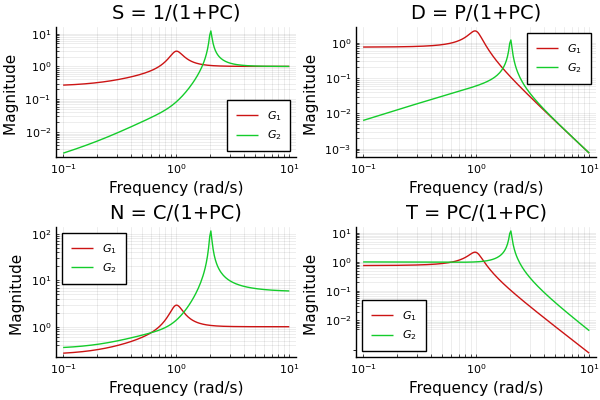

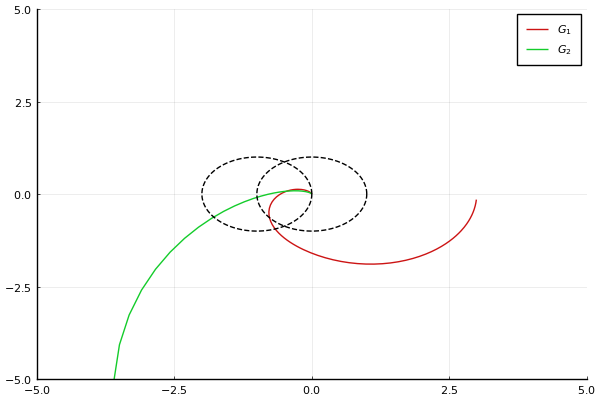

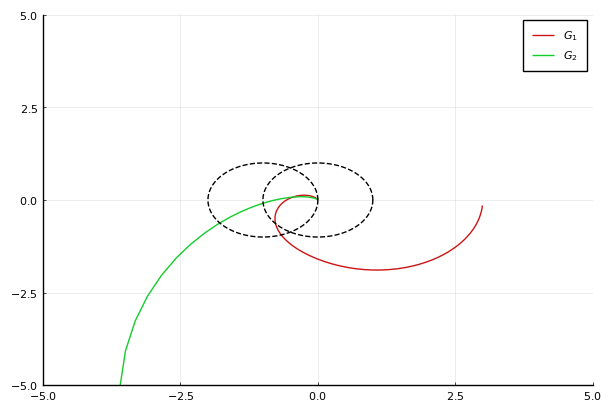

In [41]:
gangoffourplot(sys3,[tf(1),C]) |> display
nyquistplot([sys3, sys3*C], xlims = (-5,5), ylims = (-5,5)) |> display

Continuando con `stabregionPID()` esta funcion retorna los segmentos de la figura que estan en el limite de la estabilidad para una planta `P`. El controlador se asume con la forma $k_p + \frac{k_i}{s} + k_d s$. Los parametros de entrada son: 
```julia
fig, kp, ki = stabregionPID(P, kd = 0, doplot=true)
```

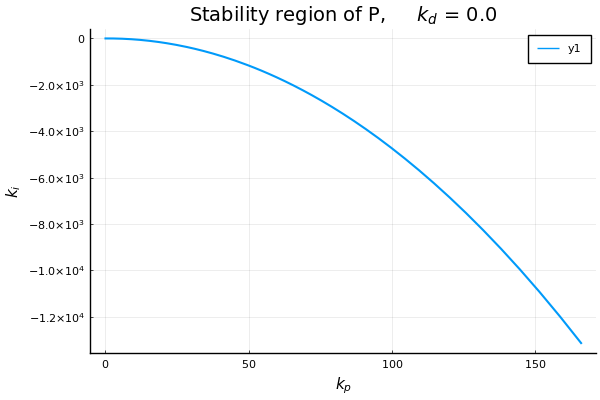

In [42]:
fig, kp, ki = stabregionPID(sys3, kd = 0)
fig

Si por alguna razon el comando anterior no genera ninguna grafica, se puede utilizar lo siguiente para generar la curva: 

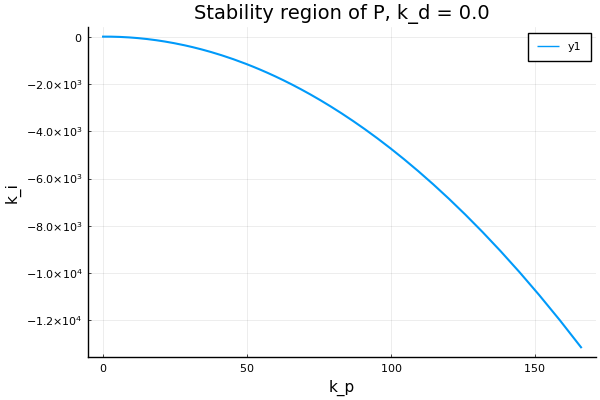

In [43]:
kd = 0
Plots.plot(kp,ki,linewidth = 1.5, xlabel="k_p", ylabel="k_i", title="Stability region of P, k_d = $(round(kd, digits=4))")

### Ejemplos de Analisis 
Los siguientes ejemplos sirven para observar las capacidades de este paquete, la mayoria son inspirados de la [documentacion oficial](https://juliacontrol.github.io/ControlSystems.jl/latest/examples/example/#LQR-design). Tomemos la siguiente planta: 

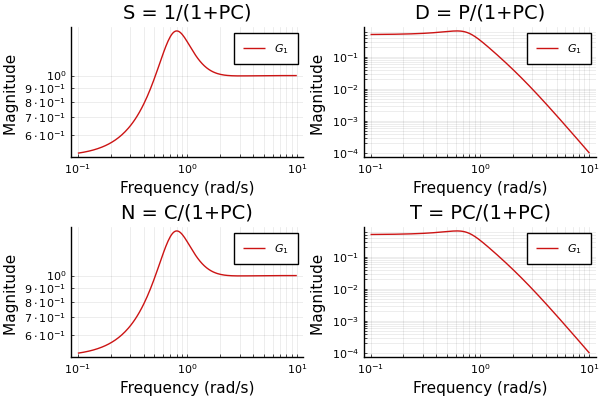

In [44]:
P = tf(1,[1,1])^4
gangoffourplot(P, tf(1)) #tf(1) es para tener como C un controlador de ganancia uno

Ahora asumamos que por alguna razon del destino queremos que a frecuencia `w = 0.8 rad/s` queremos que el margen de fase sea de 60 grados, podemos obtener el controlador que logra cumplir dicho requerimiento de forma facil de la siguiente forma:

In [45]:
wp = 0.8
kp, ki, C = loopshapingPI(P, wp, phasemargin = 60)

(0.82274734724854, -0.45472580052281375, TransferFunction{ControlSystems.SisoRational{Float64}}
0.82274734724854*s - 0.45472580052281375
----------------------------------------
                 1.0*s

Continuous-time transfer function model)

Lo anterior retorna un controlador PI que cumple la condicion deseada. Para poder comparar el controlador original con el nuevo se puede hacer de la siguiente forma: 

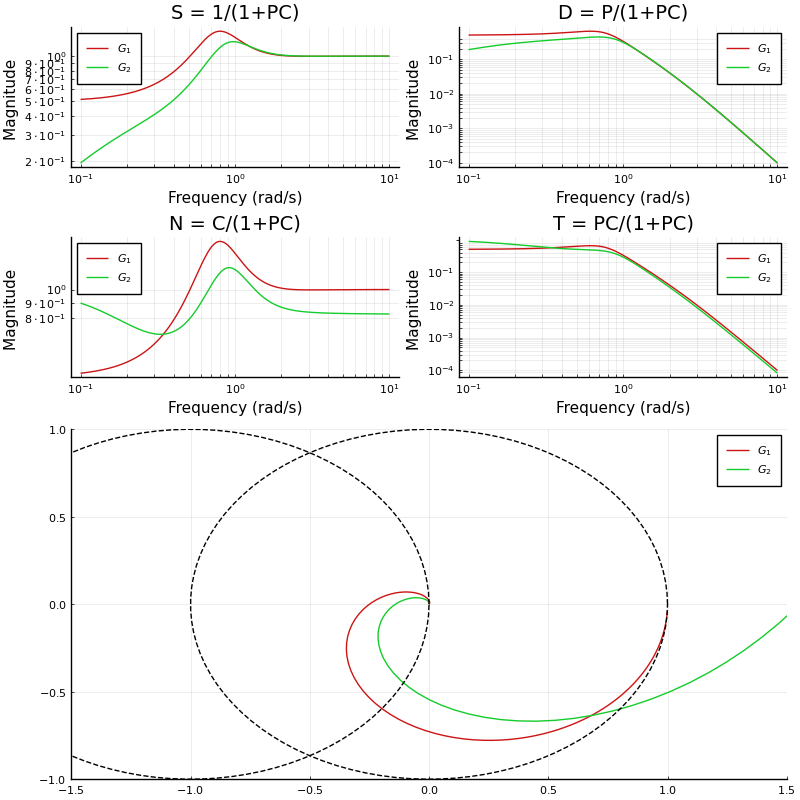

In [46]:
p1 = gangoffourplot(P, [tf(1), C]);
p2 = nyquistplot([P, P*C], ylims=(-1,1), xlims=(-1.5,1.5));

Plots.plot(p1,p2, layout=(2,1), size=(800,800))

Ahora digamos que queremos un sistema de control con ancho de banda = `2 rad/s` con cierto margen de fase dando un valor de `rl`: 

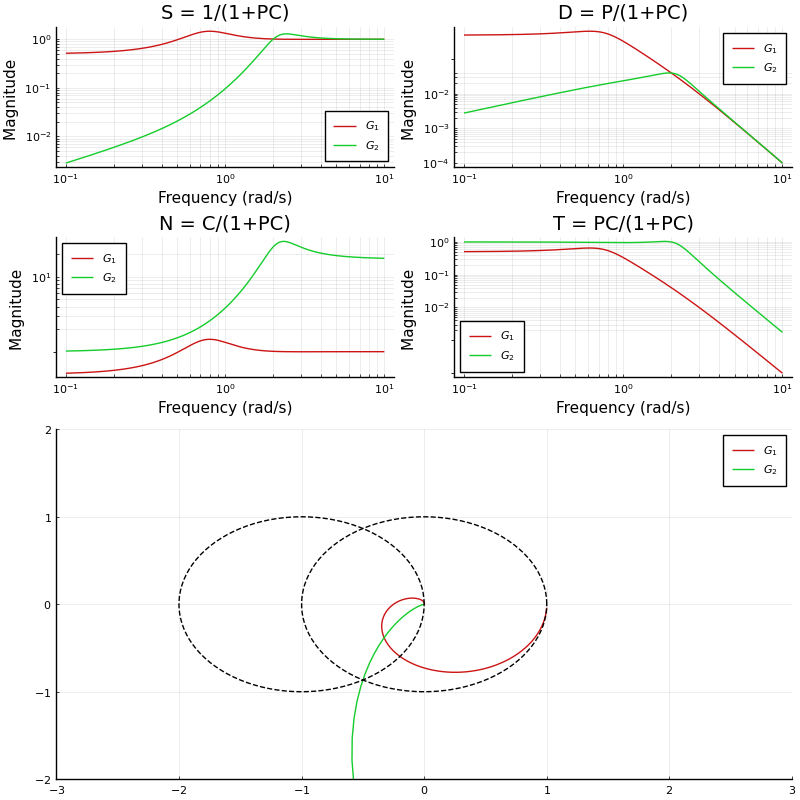

In [47]:
ωp = 2 #Ancho de banda 
kp,ki,C2 = loopshapingPI(P,ωp,rl=1,phasemargin=60, doplot=true)

p1 = gangoffourplot(P, [tf(1), C2]); #Comparacion de los sistemas de control
p2 = nyquistplot([P, P*C2], ylims=(-2,2), xlims=(-3,3));

Plots.plot(p1,p2, layout=(2,1), size=(800,800)) #Formato para desplegar graficas